In [16]:
import lenstools
from lenstools import ConvergenceMap
import astropy.units as u

In [2]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import ndimage as ndi

In [5]:
#load the kappa E-mode map produced by Axel
kappaE=fits.getdata('/Users/vajani/shear-pipe-peaks/data/P3_kappaE_0.4.fits')

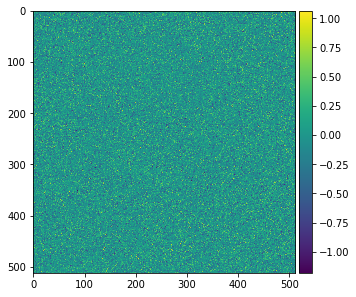

In [32]:
#extract a square patch without holes as first test 
kappa_first_test=kappaE[500:1012,3700:4212]

#plot the squared patch
plt.figure(figsize=(5,5))
ax = plt.gca()
im = ax.imshow(kappa_first_test)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

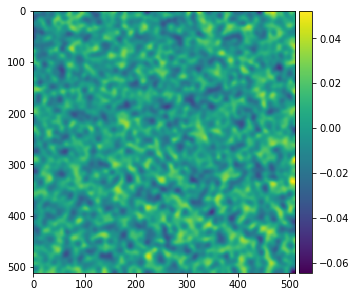

In [44]:
#pixel size in arcmin
pix_arcmin=0.4

#try different smoothing precision
precision_1=1/pix_arcmin
precision_2=2/pix_arcmin
precision_3=3/pix_arcmin

kappa_smoothed_1=ndi.gaussian_filter(kappa_first_test, precision_1)
kappa_smoothed_2=ndi.gaussian_filter(kappa_first_test, precision_2)
kappa_smoothed_3=ndi.gaussian_filter(kappa_first_test, precision_3)


plt.figure(figsize=(5,5))
ax = plt.gca()
im = ax.imshow(kappa_noisy_smoothed)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

In [49]:
kappa_map=ConvergenceMap(data=kappa_first_test,angle=(3.5*u.deg))
kappa_map_1=ConvergenceMap(data=kappa_smoothed_1,angle=(3.5*u.deg))
kappa_map_2=ConvergenceMap(data=kappa_smoothed_2,angle=(3.5*u.deg))
kappa_map_3=ConvergenceMap(data=kappa_smoothed_3,angle=(3.5*u.deg))

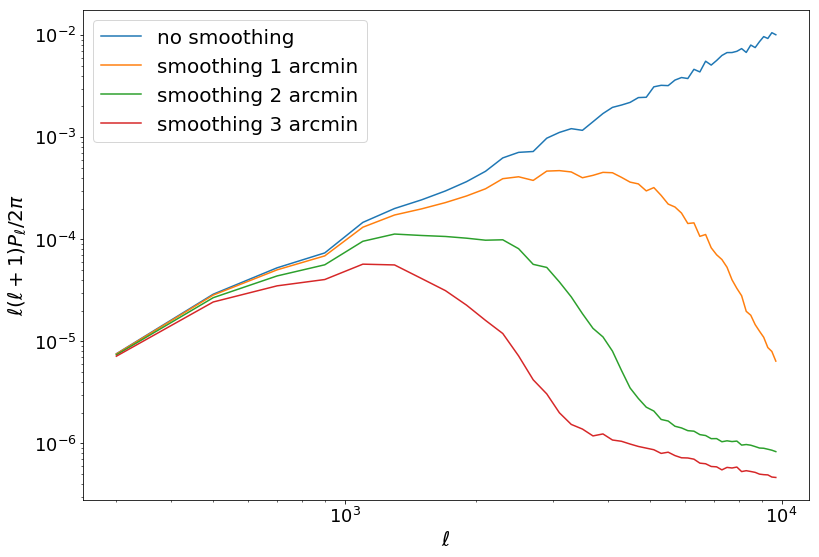

In [69]:
l_edges = np.arange(200.0,10000.0,200.0)

#Measure the power spectrum calling the powerSpectrum method
l,Pl = kappa_map.powerSpectrum(l_edges)
l,Pl_1 = kappa_map_1.powerSpectrum(l_edges)
l,Pl_2 = kappa_map_2.powerSpectrum(l_edges)
l,Pl_3 = kappa_map_3.powerSpectrum(l_edges)

#Plot the result
fig,ax = plt.subplots(figsize=(13,9))
ax.plot(l,l*(l+1)*Pl/(2.0*np.pi),label="no smoothing")
ax.plot(l,l*(l+1)*Pl_1/(2.0*np.pi),label="smoothing 1 arcmin")
ax.plot(l,l*(l+1)*Pl_2/(2.0*np.pi),label="smoothing 2 arcmin")
ax.plot(l,l*(l+1)*Pl_3/(2.0*np.pi),label="smoothing 3 arcmin")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel(r"$\ell$",fontsize=20)
ax.set_ylabel(r"$\ell(\ell+1)P_{\ell}/2\pi$", fontsize=20)
ax.legend(loc="upper left",fontsize=20)

plt.xticks(fontsize=18)  
plt.yticks(fontsize=18)  


fig.savefig("power_spectrum_one_map.png")